In [1]:
import sys
sys.path.append('../lib/')
import numpy as np
import healpy as hp
import pymaster as nmt
import matplotlib.pyplot as plt
from tqdm import trange
import simu_lib as sim

In [2]:
# Inputs

Nside = 64
lmax = 2*Nside-1
Nlbin = 1
Nsims = 250

Npixs = hp.nside2npix(Nside)

In [3]:
# Load instrument

instr_name = 'litebird_full'
instr =  np.load("../lib/instr_dict/%s.npy"%instr_name,allow_pickle=True).item()

freq = instr['frequencies']
sens = instr['sens_P']
beam = instr['beams']

Nfreqs = len(freq)
Ncross = int(Nfreqs*(Nfreqs+1) / 2)

sigma = sens / hp.nside2resol(Nside, arcmin=True)

In [4]:
# Load and bin CL_noise

b = nmt.NmtBin.from_lmax_linear(lmax, nlb=Nlbin, is_Dell=False)
leff = b.get_effective_ells()
Nbins = len(leff)

CL_noise = np.load('./CL_noise_nside%s_full.npy' % (Nside))[:Nsims]
CL_noise_binned = np.zeros((Nsims, Ncross, 2, Nbins))

for s in range(Nsims):
    for c in range(Ncross):
        CL_noise_binned[s, c, 0] = b.bin_cell(np.concatenate((np.zeros(2), CL_noise[s, c, 0, :2*Nside-2]))) #EE
        CL_noise_binned[s, c, 1] = b.bin_cell(np.concatenate((np.zeros(2), CL_noise[s, c, 1, :2*Nside-2]))) #BB

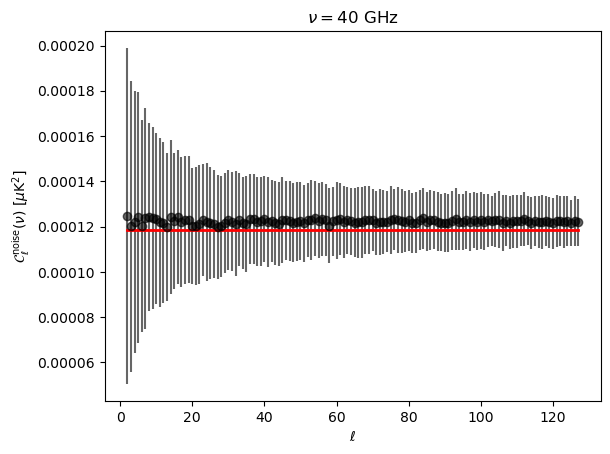

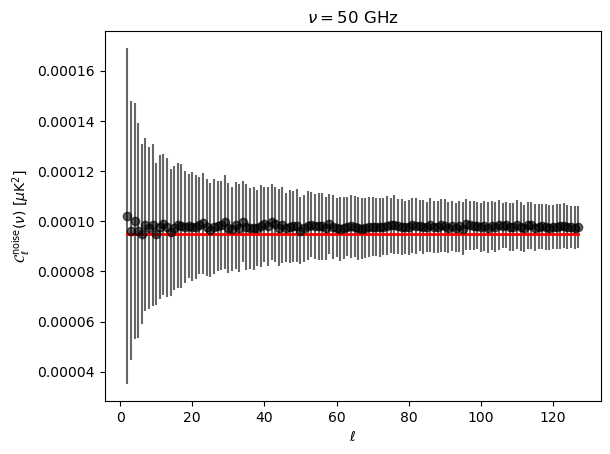

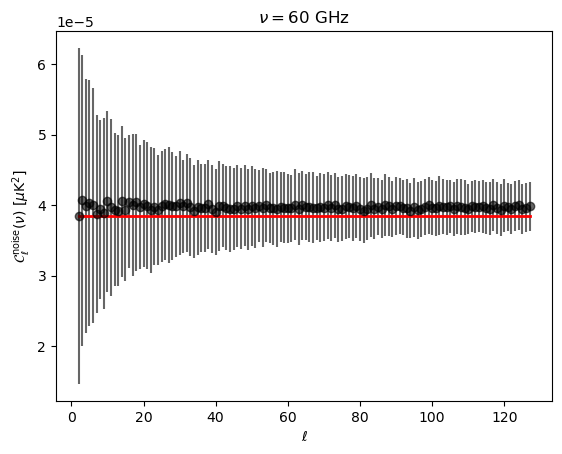

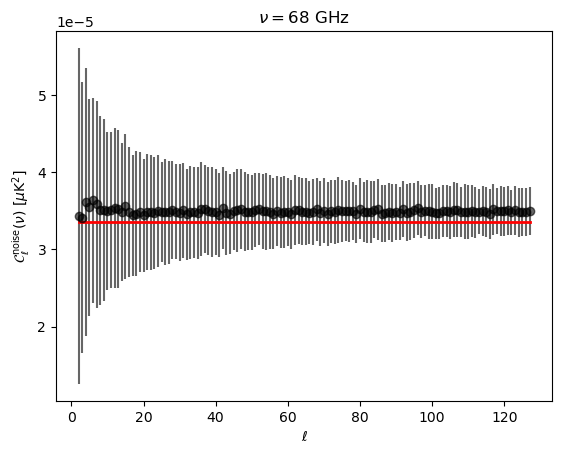

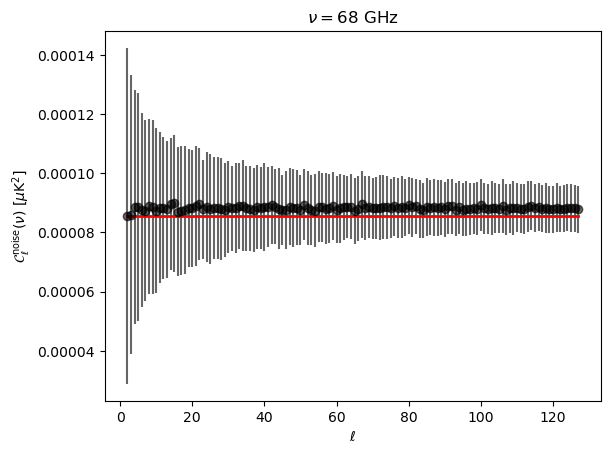

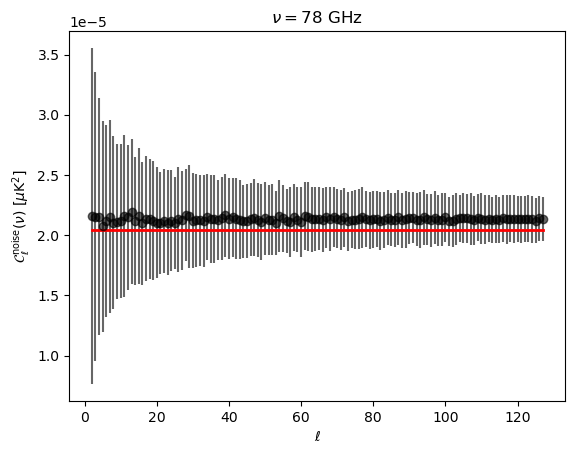

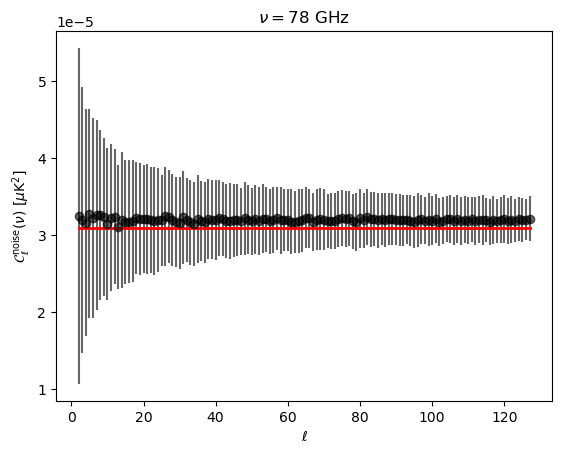

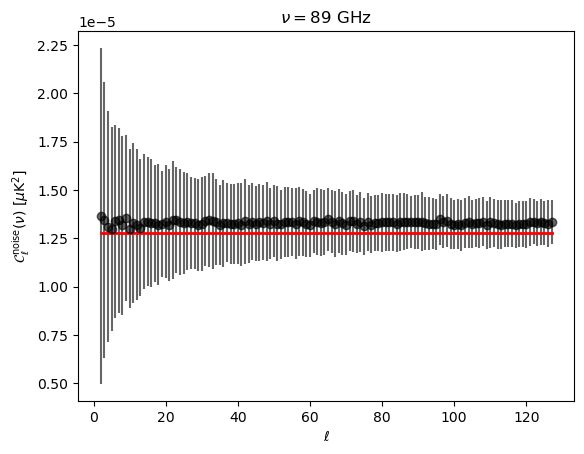

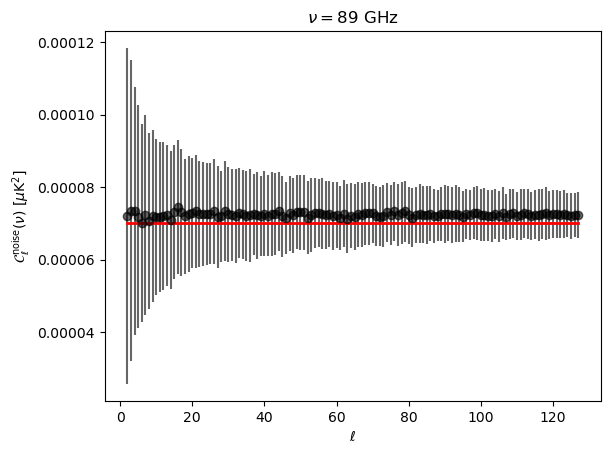

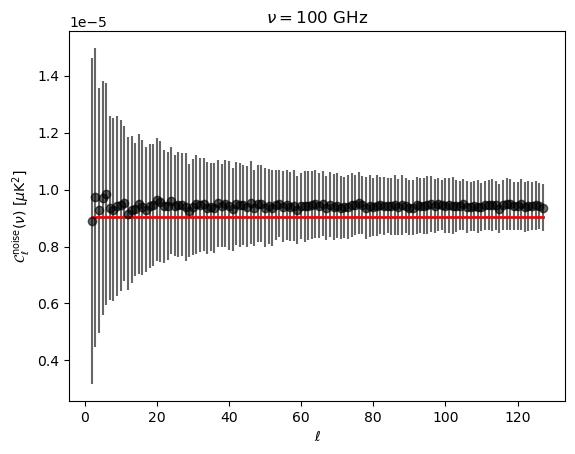

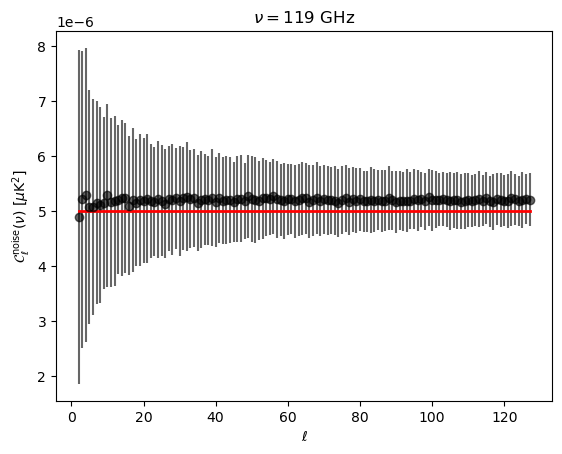

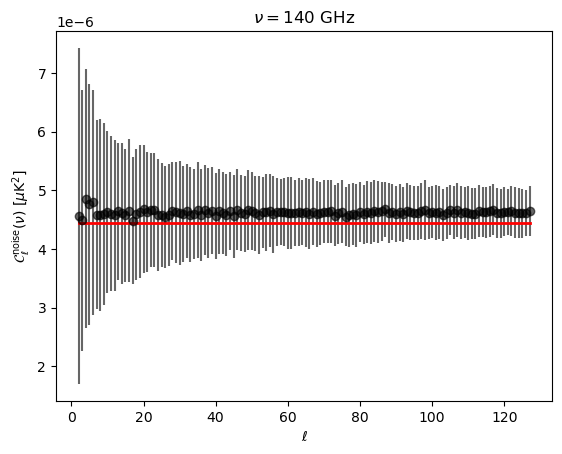

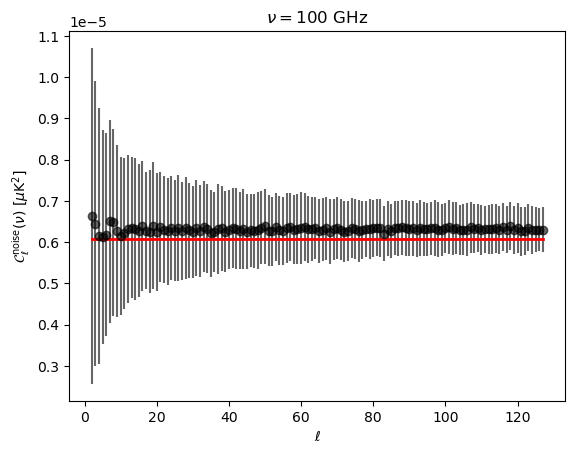

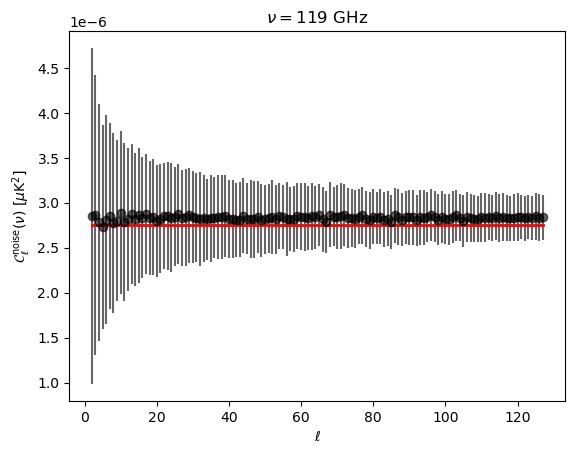

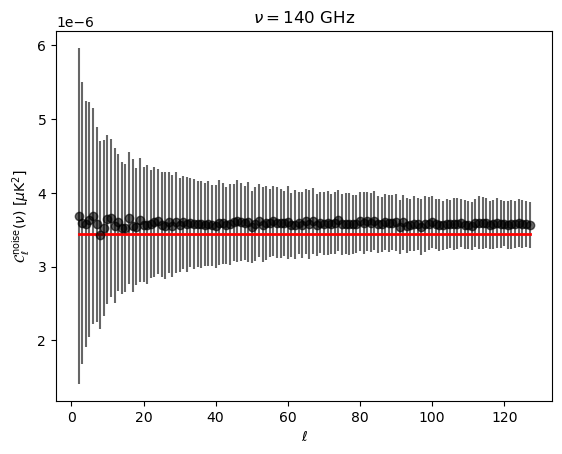

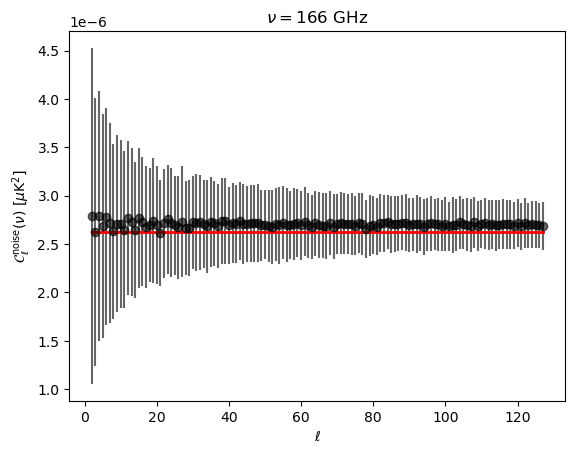

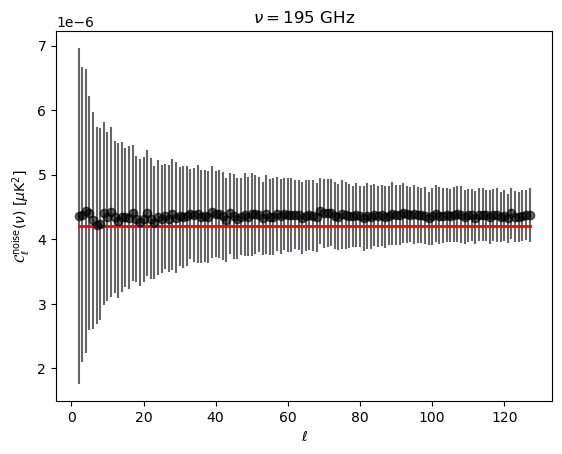

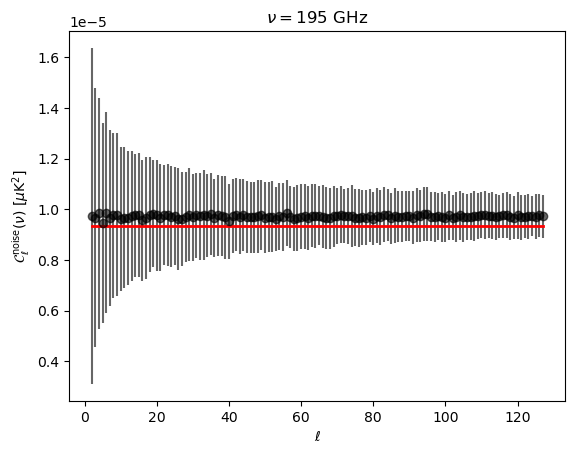

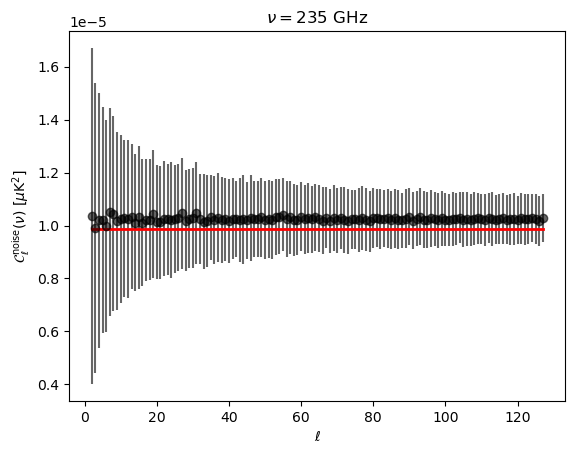

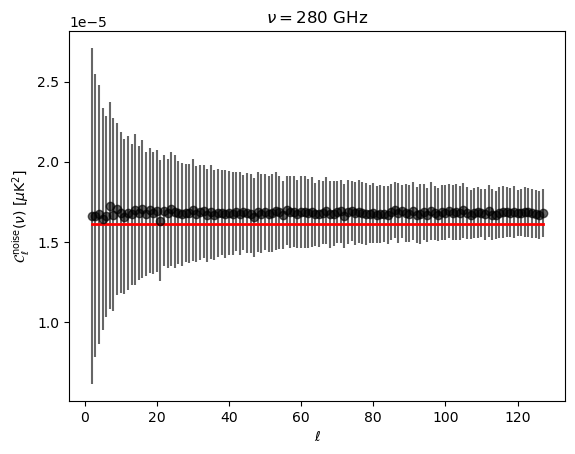

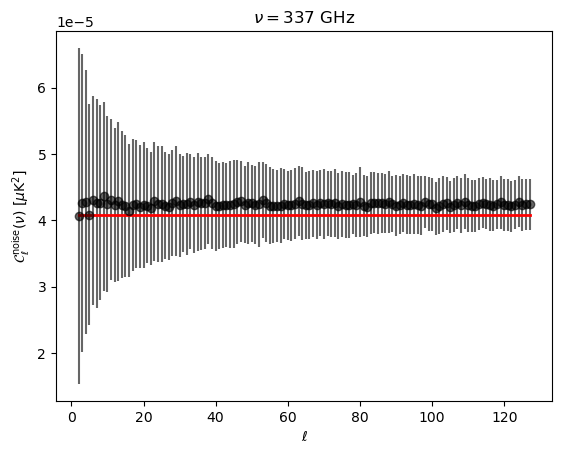

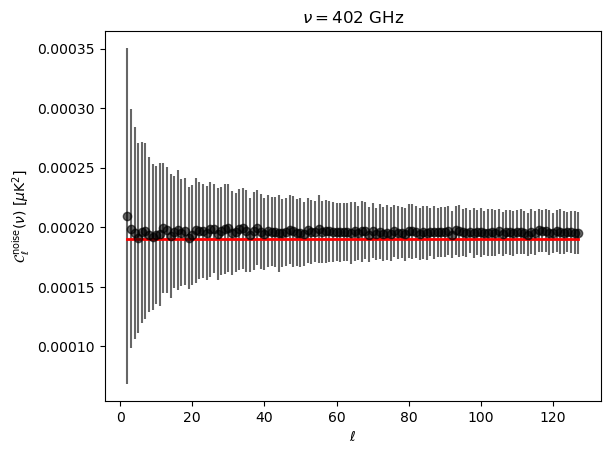

In [5]:
ell = np.arange(2, 3*Nside)

c = 0
for i in range(Nfreqs):
    for j in range(i, Nfreqs):
        if i == j:
            plt.errorbar(leff, np.mean(CL_noise_binned[:, c], axis=(0,1)), yerr=np.std(CL_noise_binned[:, c], axis=(0,1)), fmt='o', color='black', alpha=0.6)
            plt.plot(leff, 4*np.pi/Npixs * sigma[i]**2 * np.ones(Nbins), linewidth=2, color='red')
            plt.xlabel(r'$\ell$')
            plt.ylabel(r'$\mathcal{C}_\ell^{\rm noise}(\nu)$ [$\mu$K$^2$]')
            plt.title(r'$\nu =$%s GHz' % (freq[i]))
            plt.show()
        
        c += 1